<a href="https://colab.research.google.com/github/AmrithavarshiniR/OpenAITraining/blob/main/Sep24_001_EDA_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* describe a standard EDA workflow
* EXTRA: describe a standard communication & reporting process
* write a program which uses pandas to:
    * obtain a subset of columns using list indexes
    * obtain a subset of rows using locator syntax  
    * obtain descriptive statistics
    * applies a test to a column to discretize it
    * factor a continuous column with a discrete column
* write a program which uses seaborn and matplotlib to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 1: What is EDA?

## What is Exploratory Data Analysis?

* goal:
    * investigate
    * explain
    * describe
    * understand

* questions?
    * is there enough data?
    * is the data correct?
    * what is the distribution of each column?
    * how do the columns correlate?

* method
    * visual
    * primarily descriptive

## What are the tools for EDA in Python?

Simple pair: Pandas for data exploration, seaborn for visualization.


...but lots of options.

## What are the challenges around EDA?

### Challenges of EDA:

* Strategic
* Organizational
* Technical

# Part 2: EDA with Pandas

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY_batch6_2ndSep24/main/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## How do we EDA with Pandas?

* data quality, structure, etc. metrics; $\rightarrow$ `.info()`
* descriptive stats for all single columns; $\rightarrow$ `.describe()`, `.mean()`, `.value_counts()`
* descriptive stats for all pairs of columns; $\rightarrow$ `.corr()`
* domain-specific row subsets; $\rightarrow$ `df.loc`
* introduce factoring columns; $\rightarrow$ `.groupby`
* introduce domain-specific novel columns; $\rightarrow$ `df['bmi'] = df['w'] / df['h'] ** 2`

    

The purpose of computing a correlation score (default: pearson) is to determine *possible* relationships, rather than accurately measure correlation.

Note the *sign* of the score, and it's rough magnitude. You should plot all columns and pairs *regardless*.

## Exercise (20 min)

Perform an EDA of the titanic dataset with pandas, include:

* data quality, structure, etc. metrics
    * `.info()`, `.isna().sum()`, etc.
* descriptive stats for all single columns
    * `.describe()`, `.mean()`, `.median()`, `.std()`, `.value_counts()`
* understanding data for all pairs of columns
    * ie., `.corr()`

In [2]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
data = df.drop('deck', axis=1)
print(data.info())
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
--- 

In [12]:
data = df.drop('deck', axis=1)
print(data.info())
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  

In [13]:
for cname in data.columns:
  print(cname, end=" ")
  print(data[cname].value_counts().count())

# what are discrete columns?-> classification problems
# survived, pclass, sex, age
# continuous columns? -> regression problems
#

# 89 numbers-> 891 counts!
# for each age, there are at least average of 10 entries!

survived 2
pclass 3
sex 2
age 89
sibsp 7
parch 7
fare 248
embarked 4
class 3
who 3
adult_male 2
embark_town 4
alive 2
alone 2


In [44]:
rule = lambda val: 1 if val=='True' else 0
rule1 = lambda val: 1 if 'female' else 0
rule2 = lambda val: 1 if 'S' else 0

In [45]:
df['adult_male'] = df['adult_male'].apply(rule)
df['sex'] = df['sex'].apply(rule1)
df['embarked'] = df['embarked'].apply(rule2)

In [52]:
crr = data.select_dtypes(include=['int64', 'float64','boolean']).corr()

<Axes: >

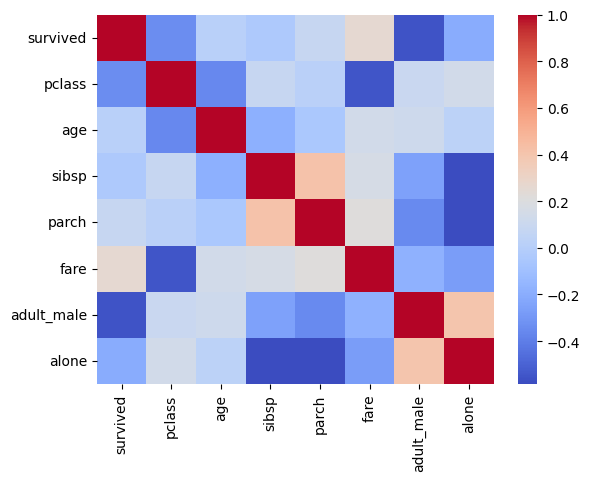

In [53]:
# heatmap-> coolwarm -> blue,red
import seaborn as sns
sns.heatmap(crr, cmap='coolwarm')